In [1]:
import pandas as pd

In [2]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [3]:
cn7 = pd.read_csv("./data/labeled_data.csv")

In [4]:
cn7 = cn7.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD", "Reason", "Clamp_Open_Position",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [5]:
cn7 = cn7[(cn7["PART_NAME"] =="CN7 W/S SIDE MLD'G RH") | (cn7["PART_NAME"] =="CN7 W/S SIDE MLD'G LH")]

In [6]:
cn7 = cn7.drop(columns=["PART_NAME"])
cn7 = cn7.replace("Y", 1).replace("N", 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22464\2016284987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7 = cn7.replace("Y", 1).replace("N", 0)


In [7]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6736 entries, 0 to 7995
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int64  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Max_Injection_Speed       6736 non-null   float64
 9   Max_Screw_RPM             6736 non-null   float64
 10  Average_Screw_RPM         6736 non-null   float64
 11  Max_Injection_Pressure    6736 non-null   float64
 12  Max_Switch_Over_Pressure  6736 non-null   float64
 13  Max_Back_Pressure         6736 non-null   float64
 14  Average_Back_

In [8]:
def remove_outliers(df, column):
    # 1사분위수(Q1)와 3사분위수(Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [9]:
cn7_pass = cn7[cn7["PassOrFail"] == 1]
cn7_fail = cn7[cn7["PassOrFail"] == 0]
cn7_pass_removed = cn7_pass.copy()
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Injection_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Plasticizing_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Cycle_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Max_Injection_Speed')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Mold_Temperature_3')
cn7_removed = pd.concat([cn7_pass_removed, cn7_fail], ignore_index=True)


Full Model Accuracy: 0.9959
Feature: Injection_Time, Accuracy Drop: 0.0000
Feature: Filling_Time, Accuracy Drop: 0.0000
Feature: Plasticizing_Time, Accuracy Drop: 0.0000
Feature: Cycle_Time, Accuracy Drop: 0.0000
Feature: Clamp_Close_Time, Accuracy Drop: 0.0000
Feature: Cushion_Position, Accuracy Drop: 0.0000
Feature: Plasticizing_Position, Accuracy Drop: 0.0000
Feature: Max_Injection_Speed, Accuracy Drop: 0.0000
Feature: Max_Screw_RPM, Accuracy Drop: 0.0000
Feature: Average_Screw_RPM, Accuracy Drop: 0.0000
Feature: Max_Injection_Pressure, Accuracy Drop: 0.0000
Feature: Max_Switch_Over_Pressure, Accuracy Drop: 0.0000
Feature: Max_Back_Pressure, Accuracy Drop: 0.0000
Feature: Average_Back_Pressure, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_1, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_2, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_3, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_4, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_5, Accuracy Drop: 0.0000
Featur

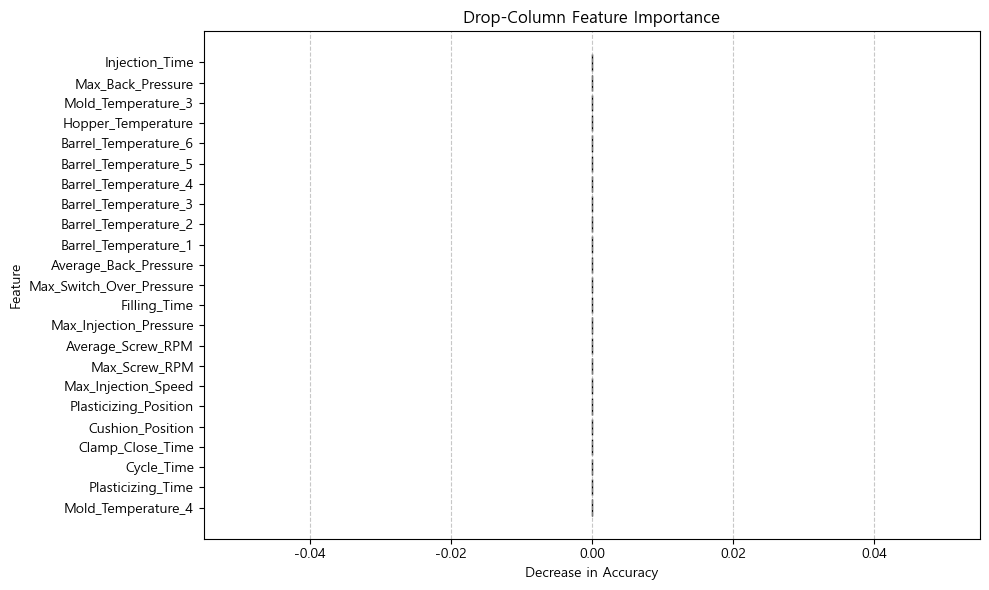

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 이미 데이터프레임(df)에 6736개의 샘플과 24개의 칼럼이 있다고 가정합니다.
# 'PassOrFail' 칼럼이 종속변수이고 나머지가 독립변수입니다.
X = cn7_removed.drop('PassOrFail', axis=1)
y = cn7_removed['PassOrFail']

# 데이터를 학습/테스트 세트로 분리 (예: 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 전체 독립변수를 사용한 Full Model 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Full Model의 기준 정확도 측정
base_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Full Model Accuracy: {base_accuracy:.4f}")

# Drop Column Importance를 저장할 사전 생성
drop_importances = {}

# 각 독립변수에 대해 순회하며 해당 변수를 제거한 후 모델 재학습 및 성능 측정
for col in X_train.columns:
    # 해당 feature를 제거한 학습 및 테스트 데이터셋 구성
    X_train_drop = X_train.drop(columns=[col])
    X_test_drop = X_test.drop(columns=[col])
    
    # 해당 feature 없이 모델 재학습
    model_drop = RandomForestClassifier(random_state=42)
    model_drop.fit(X_train_drop, y_train)
    
    # 재학습된 모델의 정확도 측정
    dropped_accuracy = accuracy_score(y_test, model_drop.predict(X_test_drop))
    
    # 기준 정확도와의 차이를 중요도로 산정
    importance = base_accuracy - dropped_accuracy
    drop_importances[col] = importance
    
    print(f"Feature: {col}, Accuracy Drop: {importance:.4f}")

# 결과를 DataFrame으로 정리하여 중요도 순으로 정렬
drop_importance_df = pd.DataFrame(list(drop_importances.items()), columns=['Feature', 'Drop_Importance'])
drop_importance_df.sort_values(by='Drop_Importance', ascending=False, inplace=True)
print("\nDrop Column Importance:")
print(drop_importance_df)

# 중요도 시각화 (중요도가 높은 순서대로 표시)
plt.figure(figsize=(10, 6))
plt.barh(drop_importance_df['Feature'], drop_importance_df['Drop_Importance'], color='salmon', edgecolor='black')
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위쪽에 위치하도록 Y축 반전
plt.title('Drop-Column Feature Importance')
plt.xlabel('Decrease in Accuracy')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


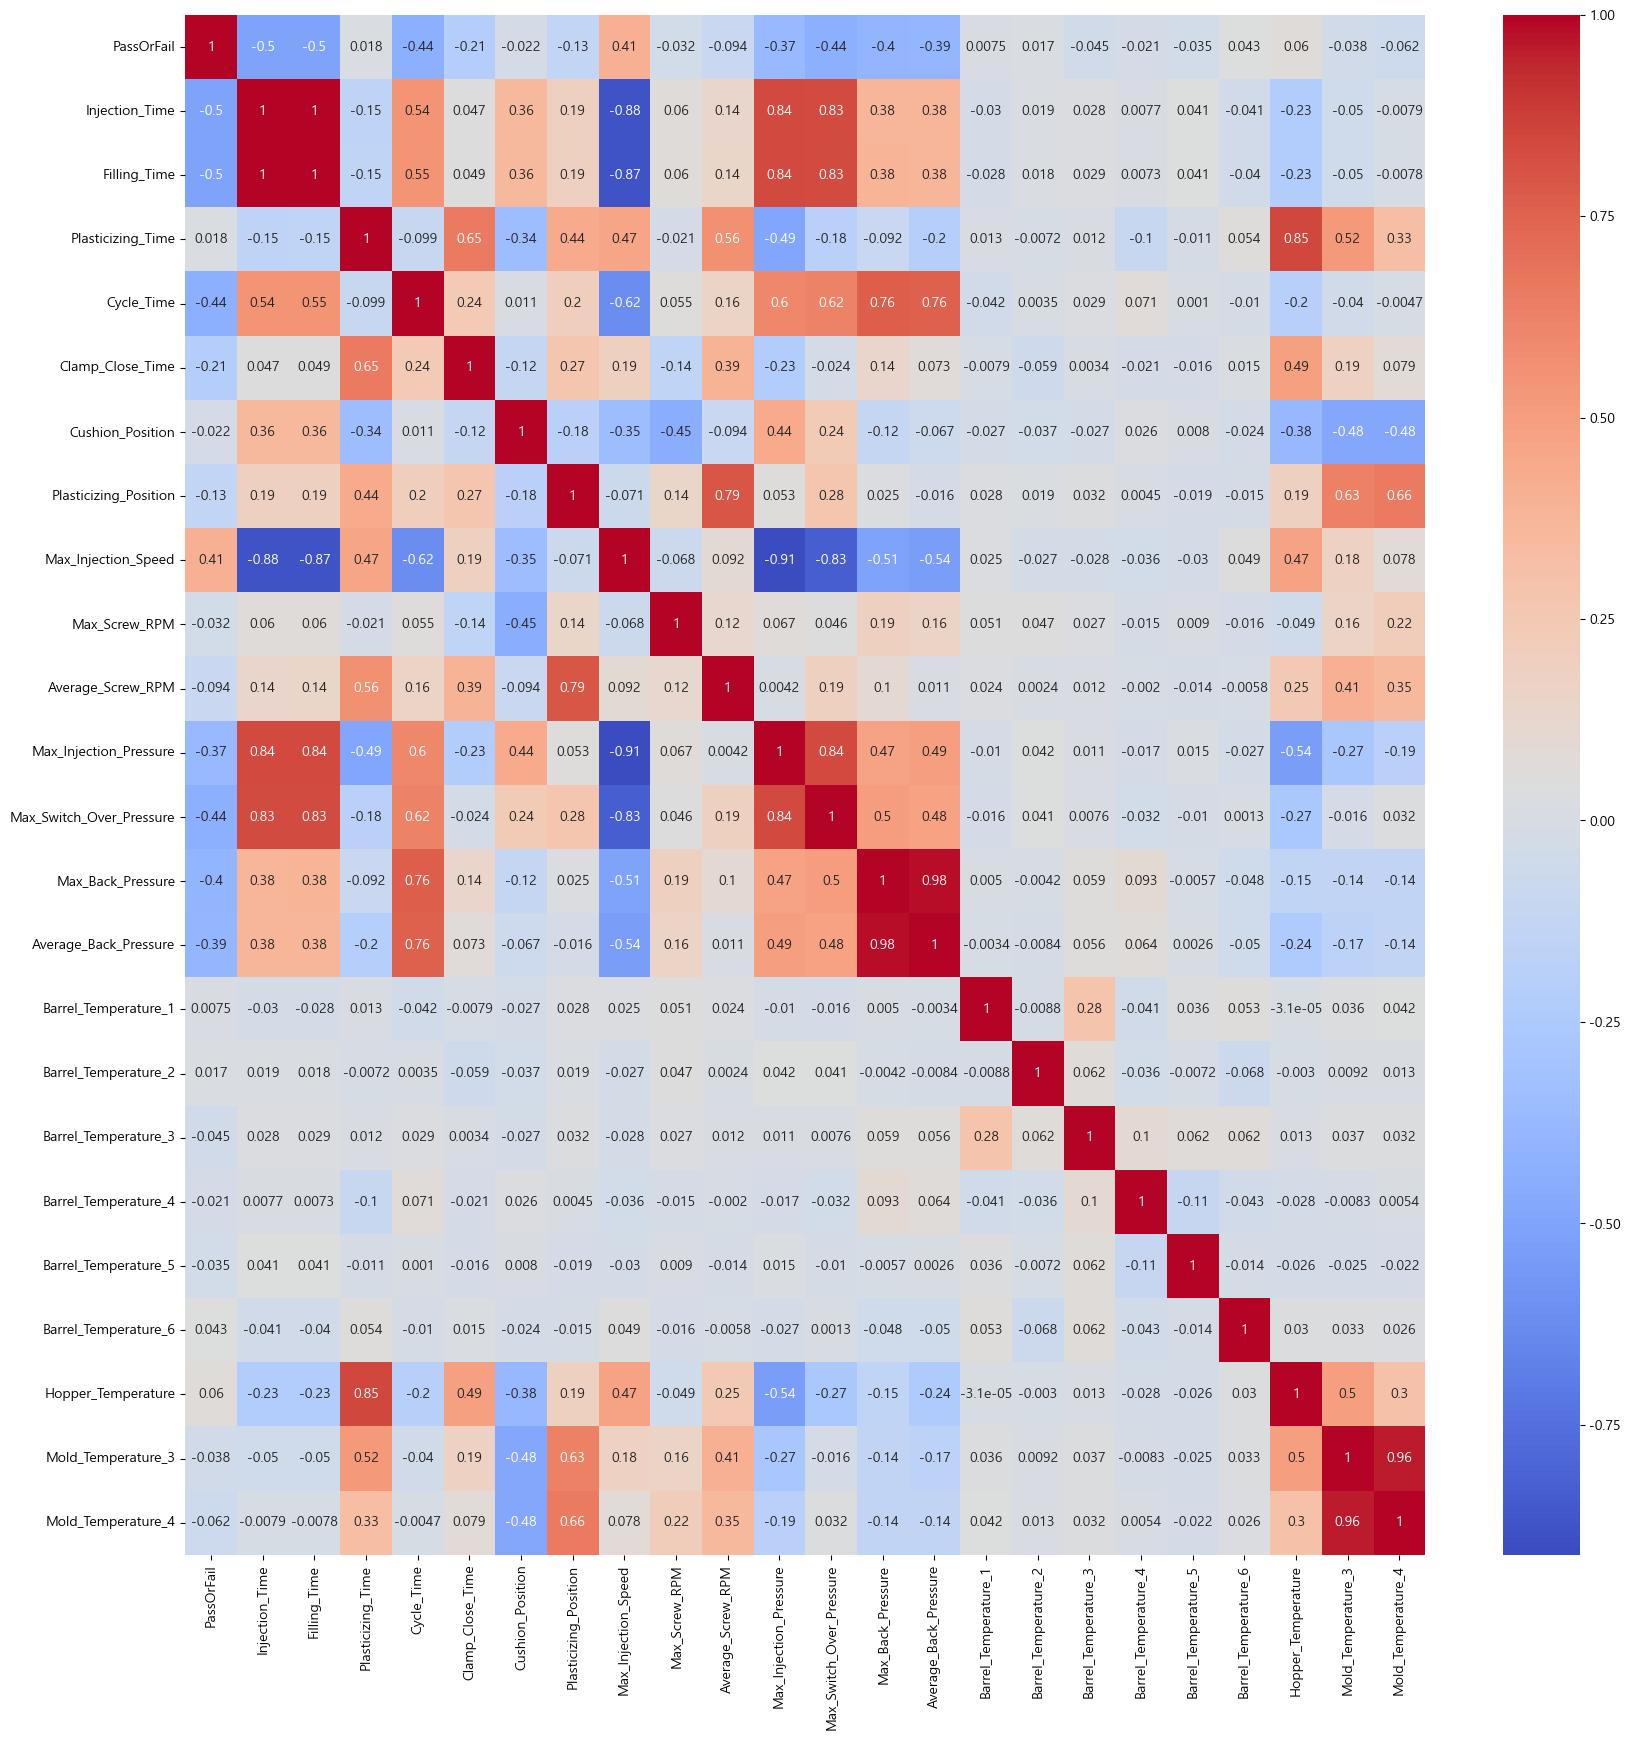

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(cn7_removed.corr(), annot=True, cmap='coolwarm')
plt.show()

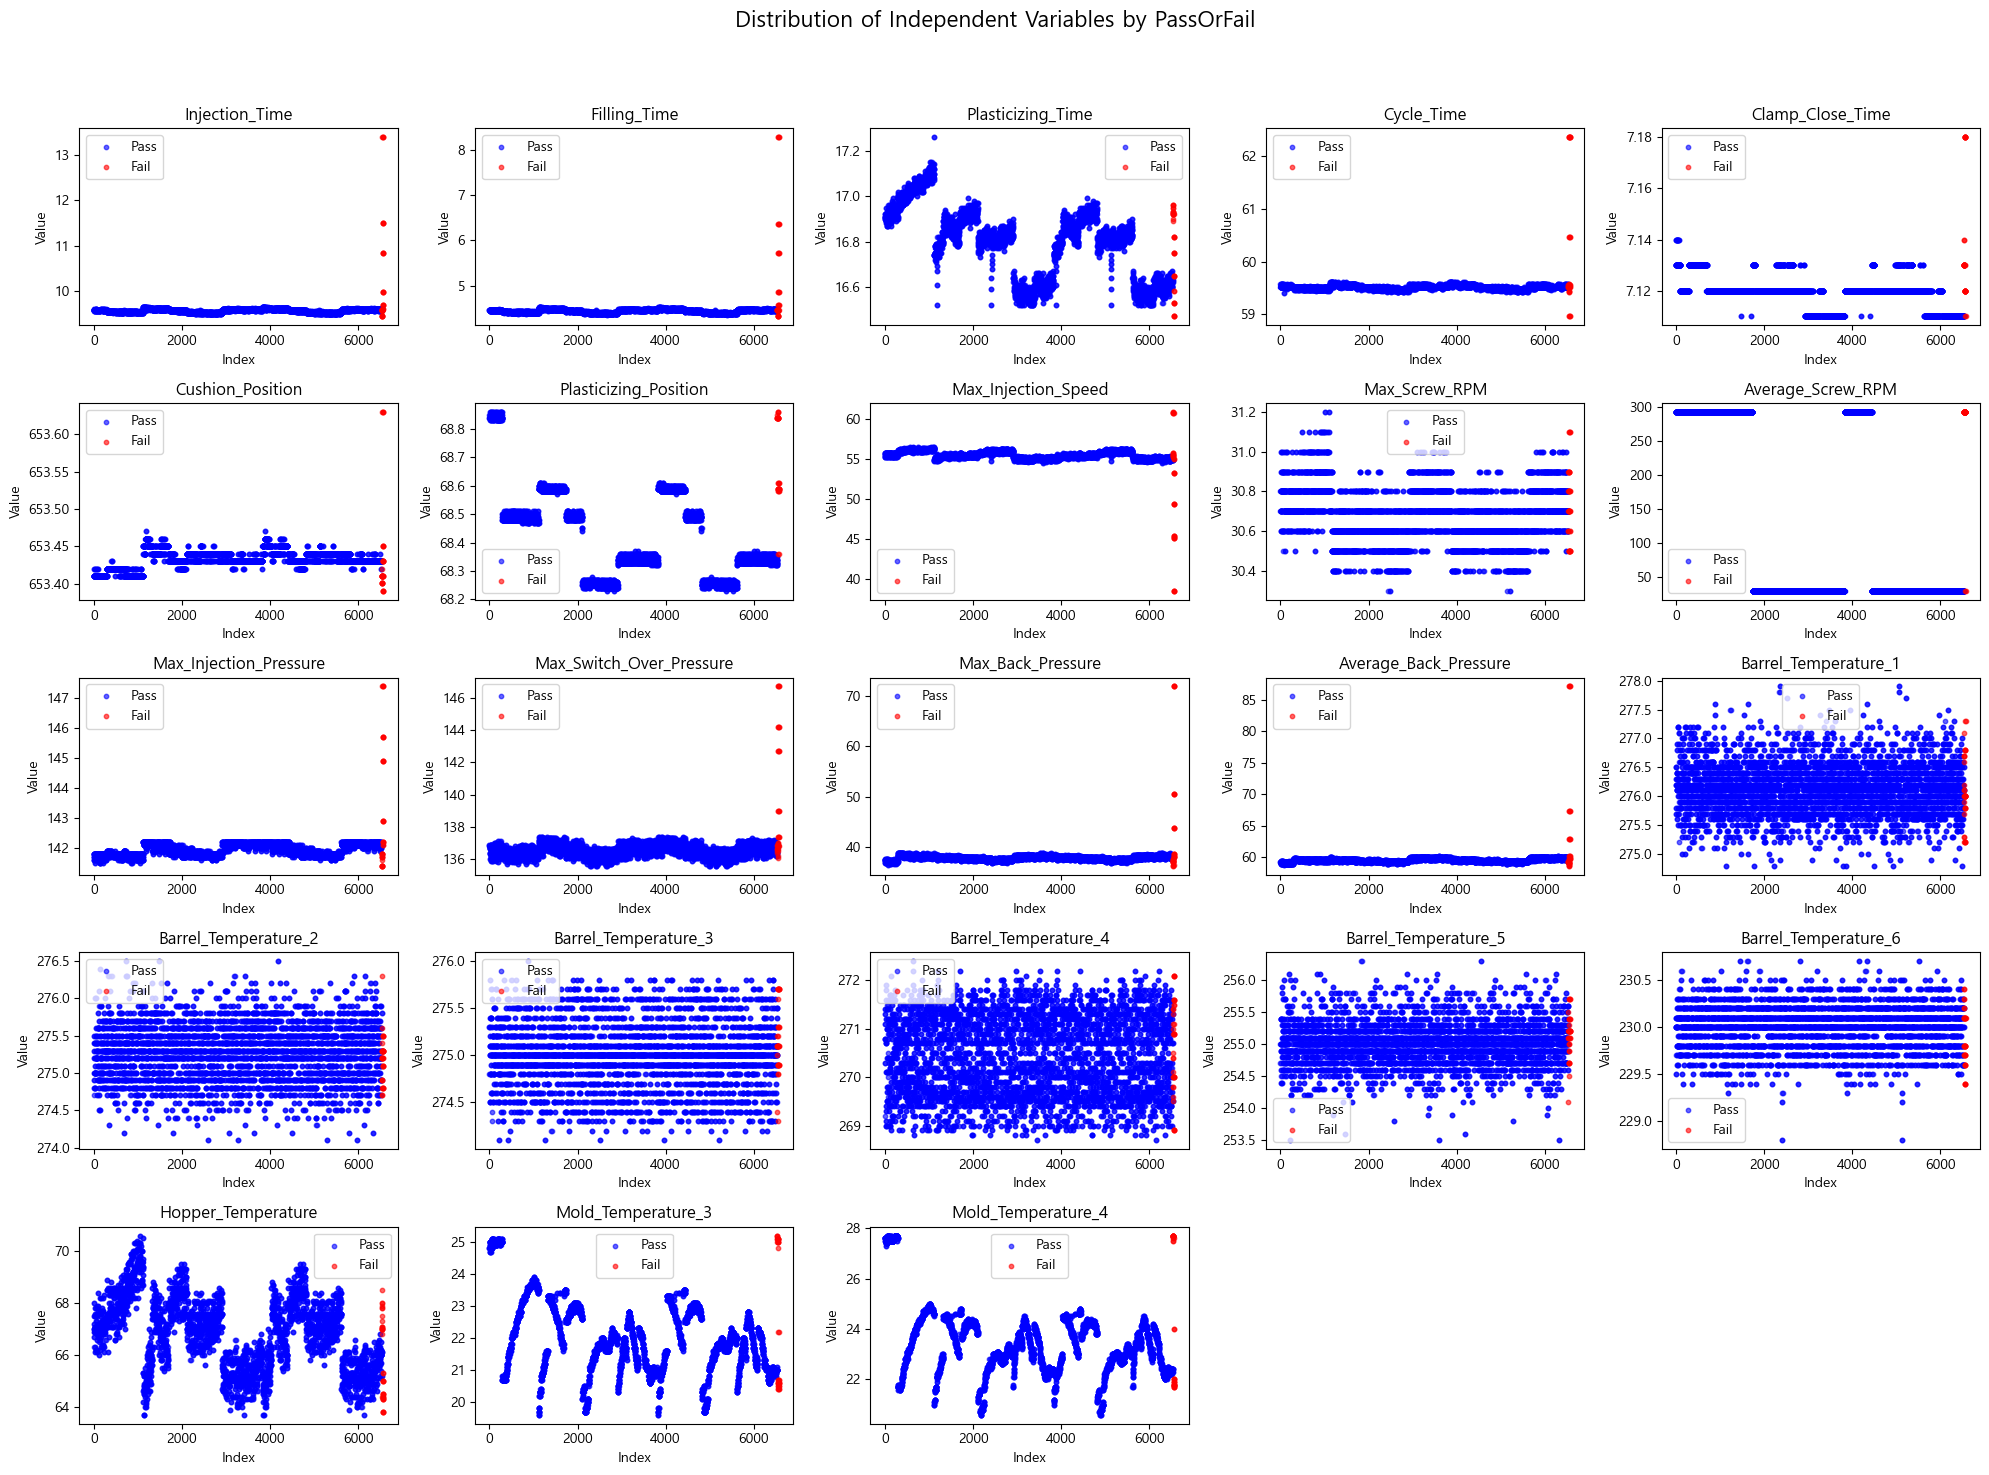

In [12]:
# 독립 변수와 종속 변수 분
y = cn7_removed["PassOrFail"]
X = cn7_removed.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
cn7_removed.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [14]:
cn7_removed = cn7_removed.drop(columns=["Mold_Temperature_3", "Filling_Time", "Max_Injection_Pressure", "Max_Injection_Pressure", "Max_Switch_Over_Pressure",
                          "Average_Back_Pressure", "Mold_Temperature_3", "Plasticizing_Time"])

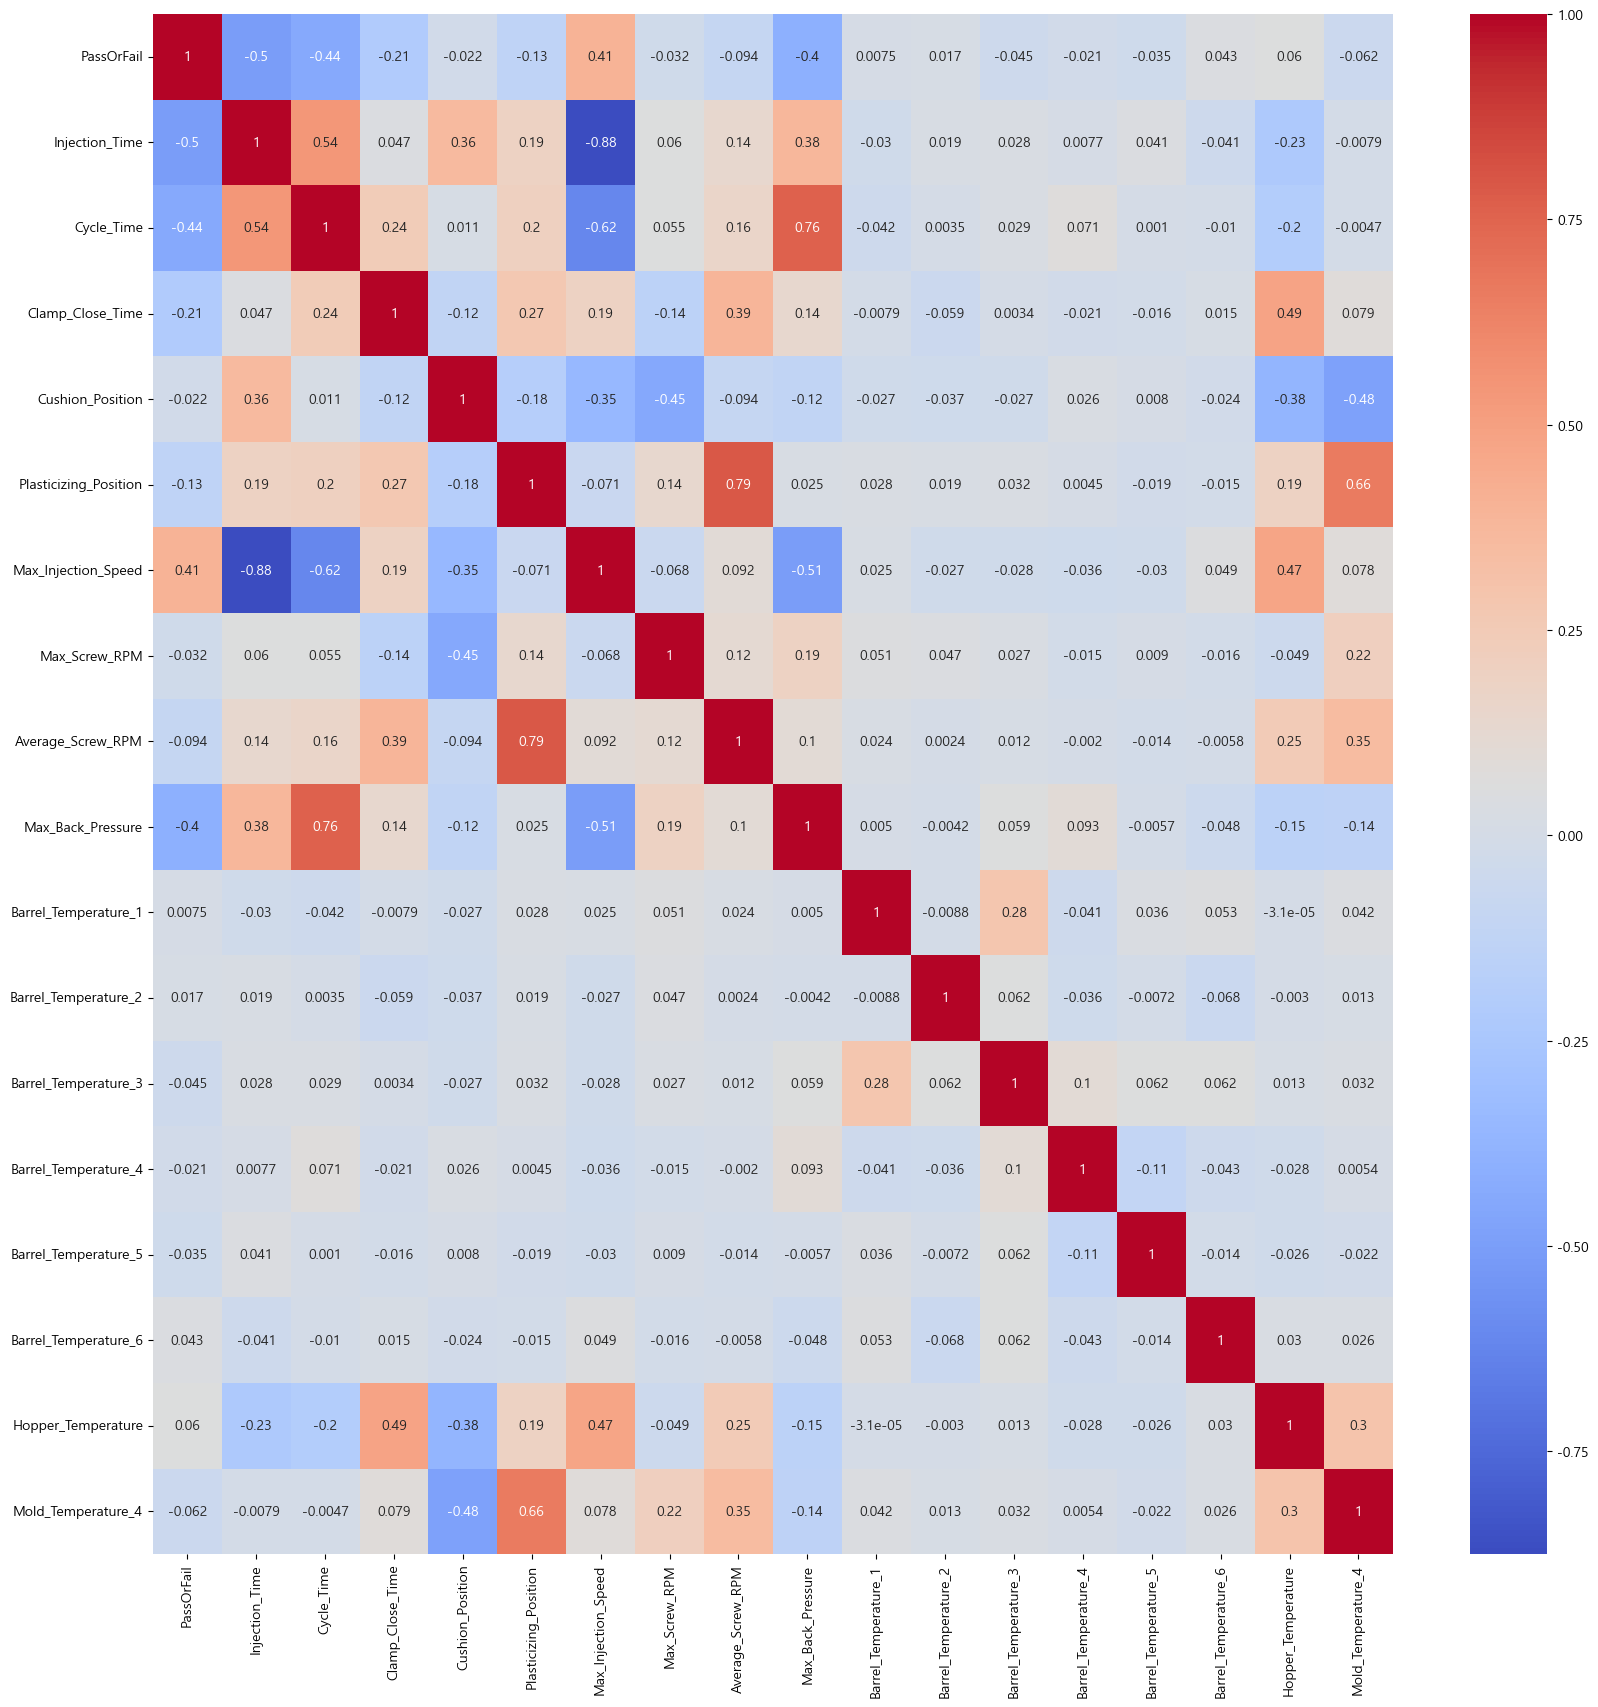

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(cn7_removed.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
cn7_removed = cn7_removed.drop(columns=["Max_Injection_Speed", "Max_Back_Pressure", "Average_Screw_RPM"])

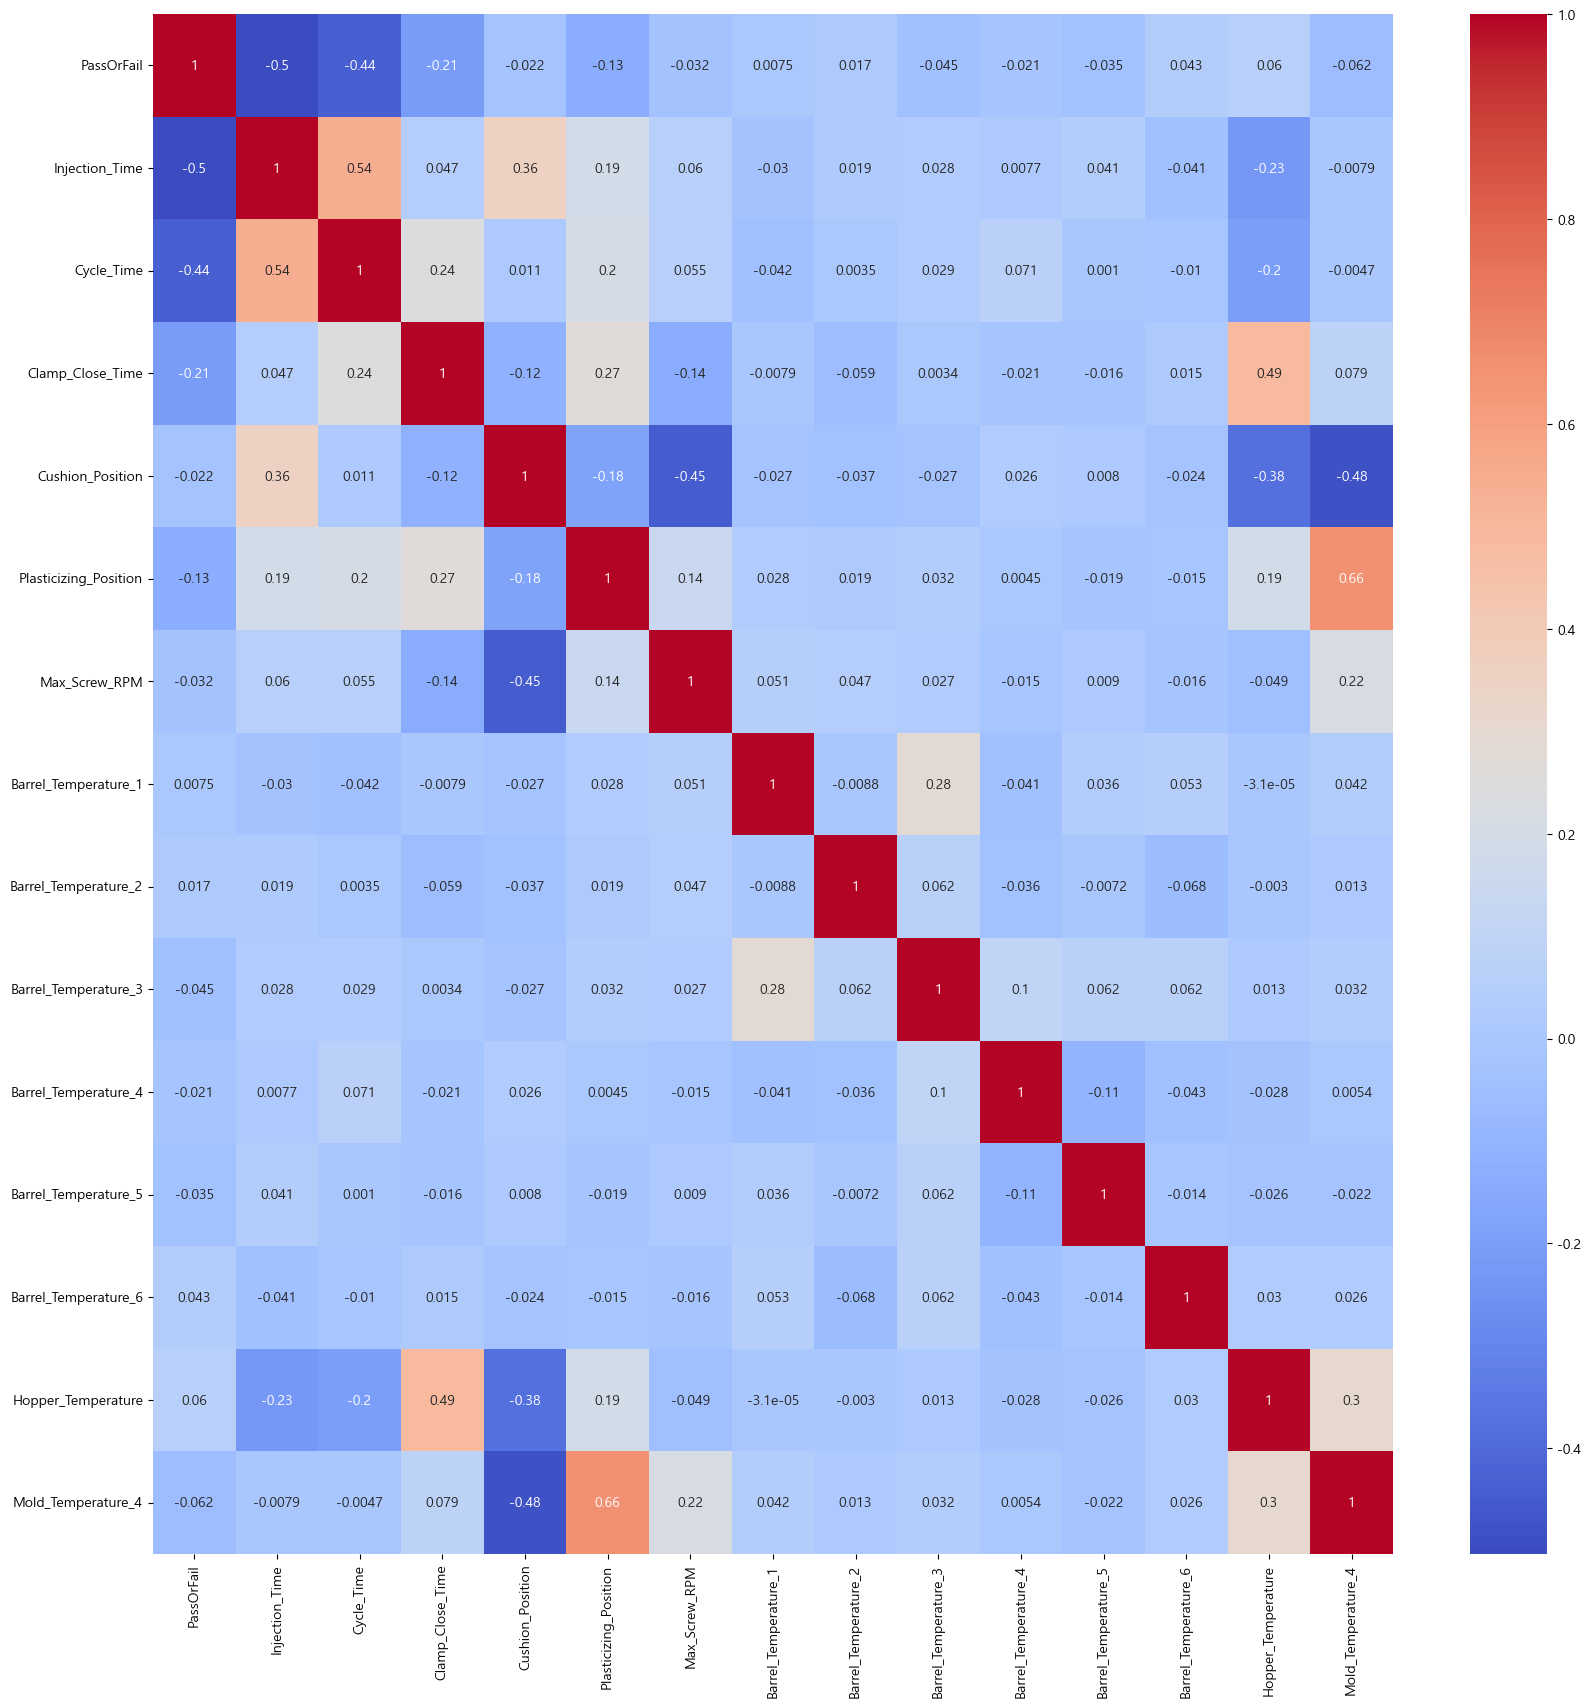

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(cn7_removed.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
from scipy.stats import spearmanr, pearsonr
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])
for col_name in X.columns:
    print(col_name)
    print("피어슨")
    print(pearsonr(X[col_name], y))
    print("스피어만")
    print(spearmanr(X[col_name], y))
    print("==================================================================")

Injection_Time
피어슨
PearsonRResult(statistic=-0.3162776787509446, pvalue=2.346258167189876e-156)
스피어만
SignificanceResult(statistic=-0.057059662757664865, pvalue=2.7857676148954673e-06)
Filling_Time
피어슨
PearsonRResult(statistic=-0.4155627692941765, pvalue=1.4244641463277663e-279)
스피어만
SignificanceResult(statistic=-0.05838992914665274, pvalue=1.6231260417892768e-06)
Plasticizing_Time
피어슨
PearsonRResult(statistic=0.014539761093083229, pvalue=0.2328045941548283)
스피어만
SignificanceResult(statistic=0.009089452066138516, pvalue=0.45574183257451106)
Cycle_Time
피어슨
PearsonRResult(statistic=-0.12141030804881987, pvalue=1.528812638599172e-23)
스피어만
SignificanceResult(statistic=-0.03553712728705212, pvalue=0.0035338904787122444)
Clamp_Close_Time
피어슨
PearsonRResult(statistic=-0.023172061842197604, pvalue=0.05720957424715091)
스피어만
SignificanceResult(statistic=-0.08858828572707865, pvalue=3.248044482276056e-13)
Cushion_Position
피어슨
PearsonRResult(statistic=0.002955068208489342, pvalue=0.8084026427847095

Full Model Accuracy: 0.9959
Feature: Injection_Time, Accuracy Drop: 0.0000
Feature: Cycle_Time, Accuracy Drop: 0.0000
Feature: Clamp_Close_Time, Accuracy Drop: 0.0000
Feature: Cushion_Position, Accuracy Drop: 0.0000
Feature: Plasticizing_Position, Accuracy Drop: 0.0000
Feature: Max_Screw_RPM, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_1, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_2, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_3, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_4, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_5, Accuracy Drop: 0.0000
Feature: Barrel_Temperature_6, Accuracy Drop: 0.0000
Feature: Hopper_Temperature, Accuracy Drop: 0.0000
Feature: Mold_Temperature_4, Accuracy Drop: 0.0000

Drop Column Importance:
                  Feature  Drop_Importance
0          Injection_Time              0.0
1              Cycle_Time              0.0
2        Clamp_Close_Time              0.0
3        Cushion_Position              0.0
4   Plasticizing_Positio

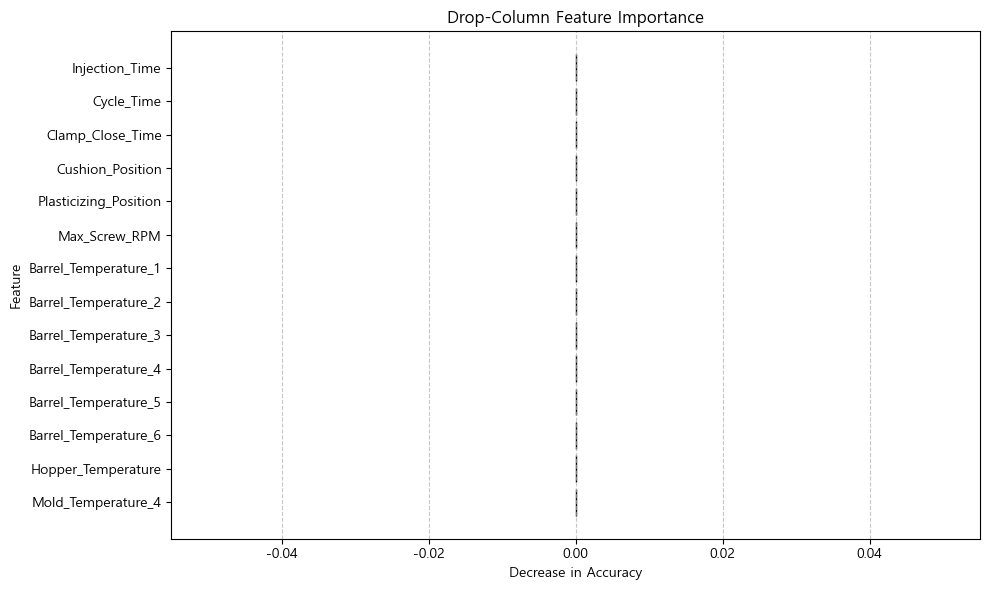

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 이미 데이터프레임(df)에 6736개의 샘플과 24개의 칼럼이 있다고 가정합니다.
# 'PassOrFail' 칼럼이 종속변수이고 나머지가 독립변수입니다.
X = cn7_removed.drop('PassOrFail', axis=1)
y = cn7_removed['PassOrFail']

# 데이터를 학습/테스트 세트로 분리 (예: 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 전체 독립변수를 사용한 Full Model 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Full Model의 기준 정확도 측정
base_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Full Model Accuracy: {base_accuracy:.4f}")

# Drop Column Importance를 저장할 사전 생성
drop_importances = {}

# 각 독립변수에 대해 순회하며 해당 변수를 제거한 후 모델 재학습 및 성능 측정
for col in X_train.columns:
    # 해당 feature를 제거한 학습 및 테스트 데이터셋 구성
    X_train_drop = X_train.drop(columns=[col])
    X_test_drop = X_test.drop(columns=[col])
    
    # 해당 feature 없이 모델 재학습
    model_drop = RandomForestClassifier(random_state=42)
    model_drop.fit(X_train_drop, y_train)
    
    # 재학습된 모델의 정확도 측정
    dropped_accuracy = accuracy_score(y_test, model_drop.predict(X_test_drop))
    
    # 기준 정확도와의 차이를 중요도로 산정
    importance = base_accuracy - dropped_accuracy
    drop_importances[col] = importance
    
    print(f"Feature: {col}, Accuracy Drop: {importance:.4f}")

# 결과를 DataFrame으로 정리하여 중요도 순으로 정렬
drop_importance_df = pd.DataFrame(list(drop_importances.items()), columns=['Feature', 'Drop_Importance'])
drop_importance_df.sort_values(by='Drop_Importance', ascending=False, inplace=True)
print("\nDrop Column Importance:")
print(drop_importance_df)

# 중요도 시각화 (중요도가 높은 순서대로 표시)
plt.figure(figsize=(10, 6))
plt.barh(drop_importance_df['Feature'], drop_importance_df['Drop_Importance'], color='salmon', edgecolor='black')
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위쪽에 위치하도록 Y축 반전
plt.title('Drop-Column Feature Importance')
plt.xlabel('Decrease in Accuracy')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# VIF 계산을 위한 함수 정의
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [calculate_single_vif(data, i) for i in range(data.shape[1])]
    return vif

# 각 변수에 대해 VIF 계산
def calculate_single_vif(data, i):
    # 독립변수(다른 변수들)와 회귀 모델을 적합
    x = data.drop(data.columns[i], axis=1)  # 해당 변수 이외의 변수들
    y = data.iloc[:, i]  # 해당 변수
    model = LinearRegression()
    model.fit(x, y)
    # R^2 값 계산
    r2 = model.score(x, y)
    # VIF 계산: 1 / (1 - R^2)
    return 1 / (1 - r2)

# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7_removed.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7_removed[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)



,Variable,VIF
13,Mold_Temperature_4,2.605786
3,Cushion_Position,2.551887
4,Plasticizing_Position,2.192980
0,Injection_Time,2.013342
1,Cycle_Time,1.901863
12,Hopper_Temperature,1.881988
2,Clamp_Close_Time,1.742941
5,Max_Screw_RPM,1.506434
8,Barrel_Temperature_3,1.121957
6,Barrel_Temperature_1,1.103844


In [24]:
cn7_removed.drop(columns=["Barrel_Temperature_3","Barrel_Temperature_1","Barrel_Temperature_4",
                          "Barrel_Temperature_5","Barrel_Temperature_2","Barrel_Temperature_6",
                          "Cushion_Position", "Hopper_Temperature",
                          "Max_Screw_RPM","Mold_Temperature_4", ])

,PassOrFail,Injection_Time,Cycle_Time,Clamp_Close_Time,Plasticizing_Position
0,1,9.59,59.520000,7.13,68.849998
1,1,9.60,59.580002,7.13,68.839996
2,1,9.60,59.580002,7.13,68.839996
3,1,9.59,59.560001,7.13,68.839996
4,1,9.59,59.560001,7.13,68.839996
...,...,...,...,...,...
6568,0,9.98,60.459999,7.12,68.610001
6569,0,9.98,60.459999,7.12,68.610001
6570,0,9.70,58.959999,7.12,68.589996
6571,0,9.70,58.959999,7.12,68.589996
